In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('E:\COURSE_DATA_SCIENCE\Projects\Project_4')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
netflix_data = pd.read_csv('netflix_titles.csv')

In [5]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix_data.shape

(8807, 12)

In [7]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
netflix_data.duplicated().sum()

0

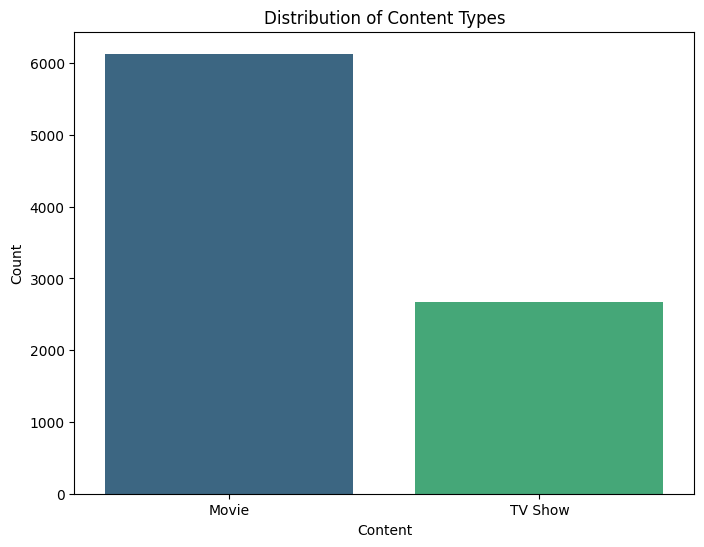

In [11]:
# 1. Distribution of Content Types
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_data, x='type', palette='viridis')
plt.title('Distribution of Content Types')
plt.xlabel('Content')
plt.ylabel('Count')
plt.show()

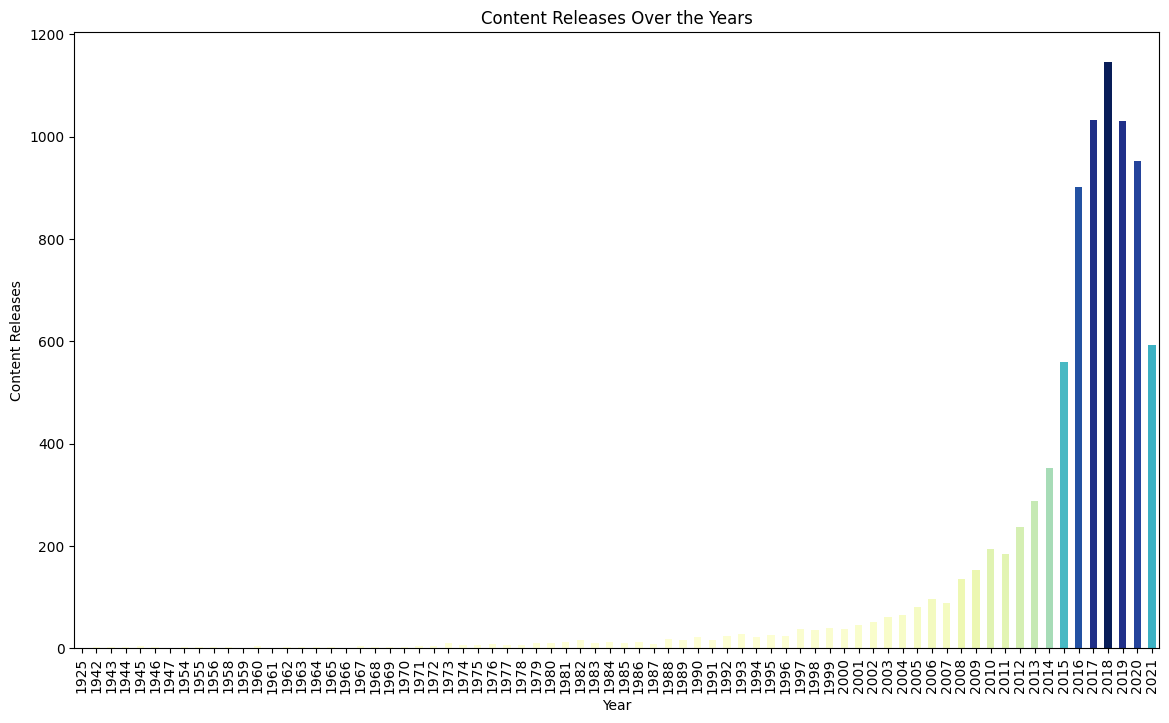

In [12]:
# 2. Content Over Time
release_year = netflix_data['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 8))
colors = plt.cm.YlGnBu(release_year.values / max(release_year.values))  # Normalize values for colormap
release_year.plot(kind='bar', color=colors)
plt.title('Content Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Content Releases')
plt.show()

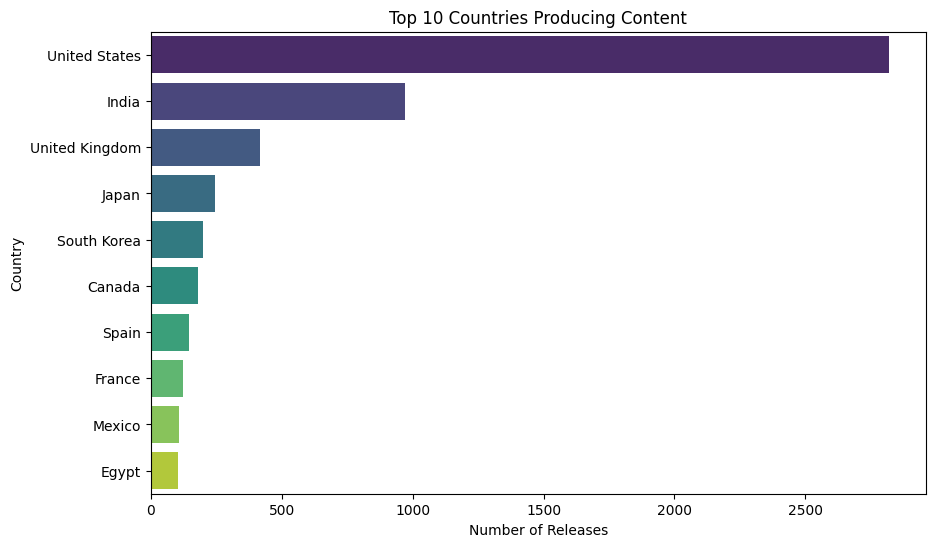

In [13]:
# 3. Top Countries Producing Content
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Releases')
plt.ylabel('Country')
plt.show()

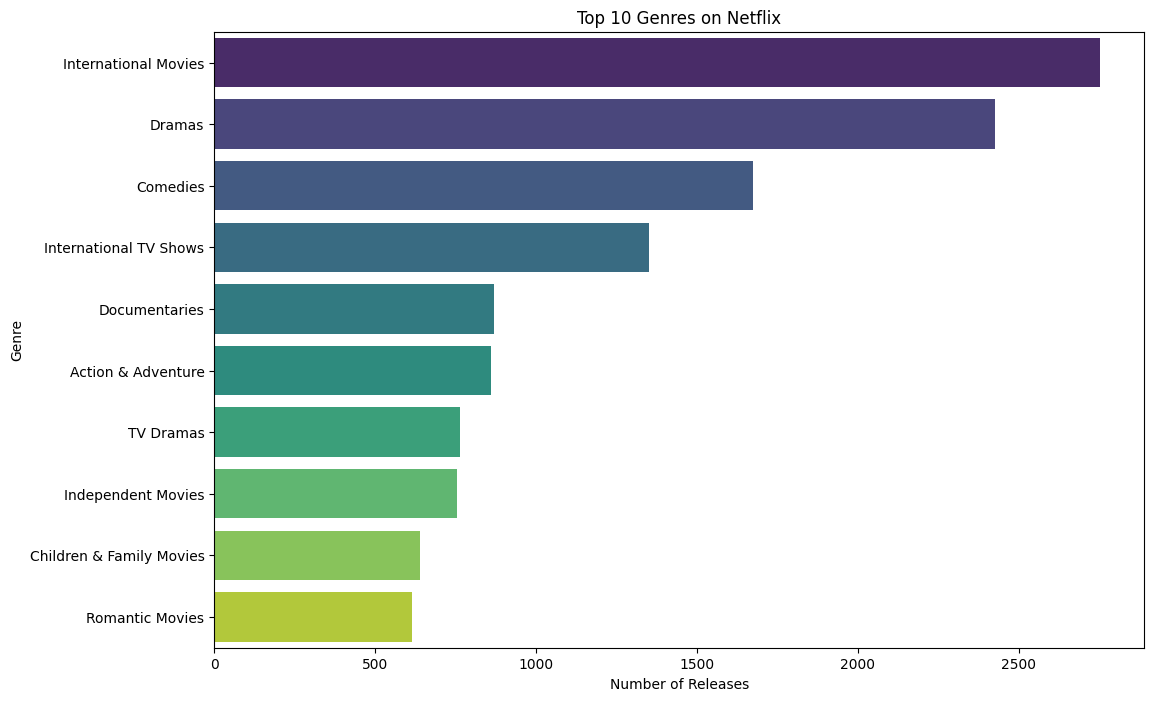

In [14]:
# 4. Common Genres
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(', ')
genres = netflix_data.explode('listed_in')['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=genres.values, y=genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Releases')
plt.ylabel('Genre')
plt.show()

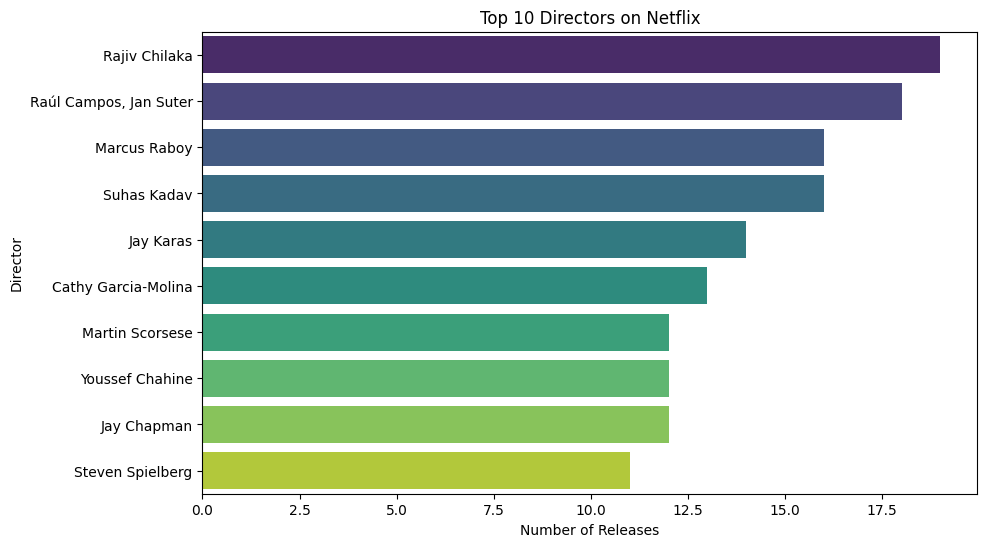

In [15]:
# 5. Top Directors
top_directors = netflix_data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Releases')
plt.ylabel('Director')
plt.show()

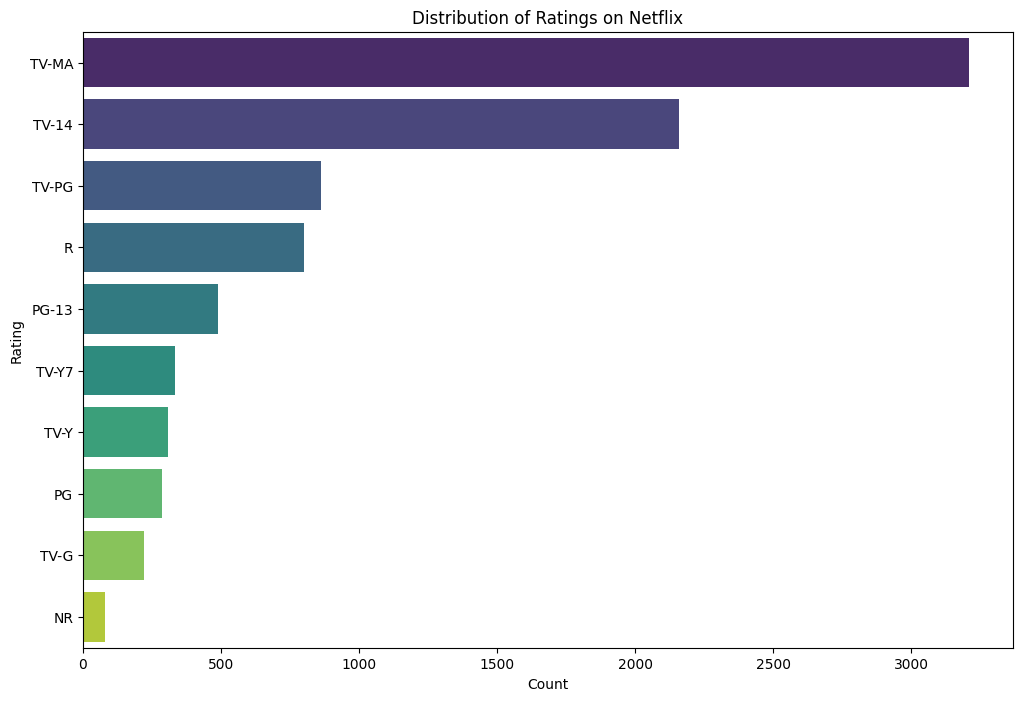

In [16]:
# 6. Rating Analysis
plt.figure(figsize=(12, 8))
sns.countplot(data=netflix_data, y='rating', order=netflix_data['rating'].value_counts().head(10).index, palette='viridis')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

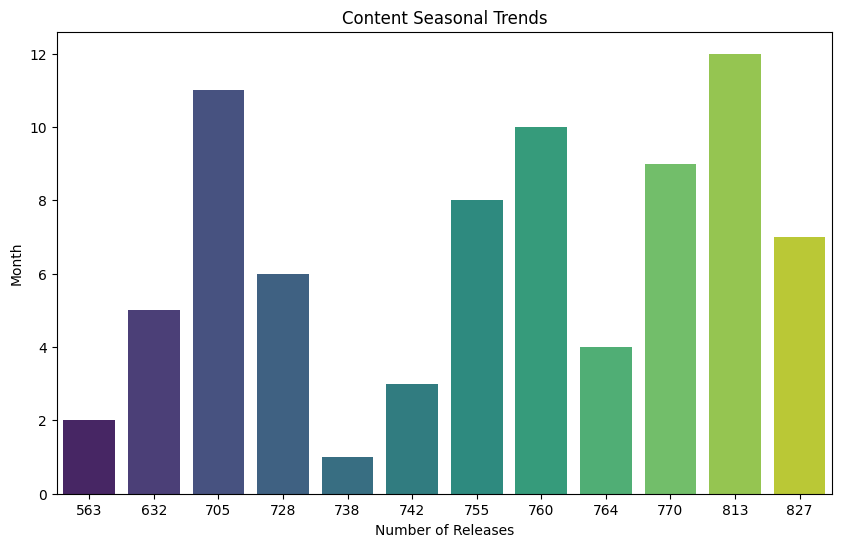

In [17]:
# 7. Seasonal Trends
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
content_per_month = netflix_data['date_added'].dt.month.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=content_per_month, y=content_per_month.index, palette='viridis')
plt.title('Content Seasonal Trends')
plt.xlabel('Number of Releases')
plt.ylabel('Month')
plt.show()

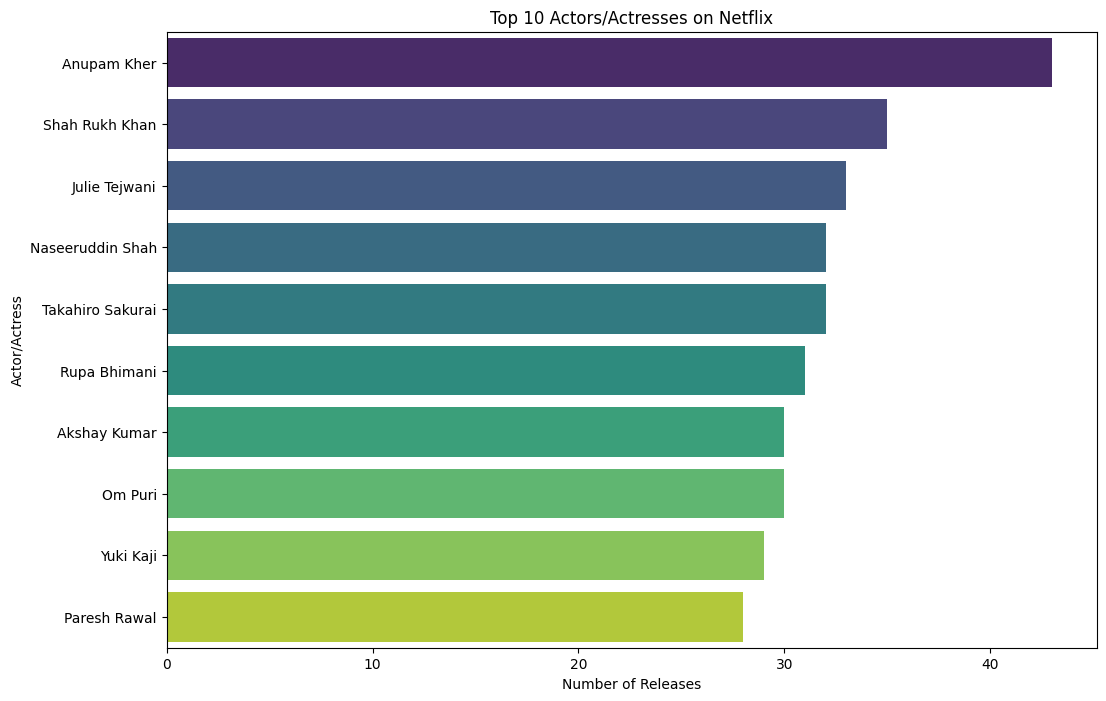

In [18]:
# 8. Actor Popularity
netflix_data['cast'] = netflix_data['cast'].str.split(', ')
actors = netflix_data.explode('cast')['cast'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=actors.values, y=actors.index, palette='viridis')
plt.title('Top 10 Actors/Actresses on Netflix')
plt.xlabel('Number of Releases')
plt.ylabel('Actor/Actress')
plt.show()